Task - 1: Implementation of MCP Neurons:


In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []  # Initialize an empty list to store the neuron's state

  for i in range(len(X1)):
    sum_inputs = X1[i] + X2[i]  # Calculate the sum of inputs
    if sum_inputs >= T:  # Check if the sum is greater than or equal to the threshold
      state_neuron.append(1)  # Neuron fires (output 1)
    else:
      state_neuron.append(0)  # Neuron doesn't fire (output 0)

  return state_neuron  # Return the list of neuron states



In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []  # Initialize an empty list to store the neuron's state

    for i in range(len(X1)):
        sum_inputs = X1[i] + X2[i]  # Calculate the sum of inputs
        if sum_inputs >= T:  # Check if the sum is greater than or equal to the threshold
            state_neuron.append(1)  # Neuron fires (output 1)
        else:
            state_neuron.append(0)  # Neuron doesn't fire (output 0)

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Question - 1: List out all the limitations of MCP - Neurons.
Ans: MCP - Neurons are not suitable for solving real-world complex problems, they are basic model with limited capabilities.Limitationa are:
1.  Binary Inputs and Outputs,
2.   Fixed Weights and Threshold,




Task 2: Perceptron Algorithm for 0 vs 1 Classification.


## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question - 1: What does the shape of X represent?
Ans : It represents the dimensiona of the feature matrix.

### Viewing the Dataset.

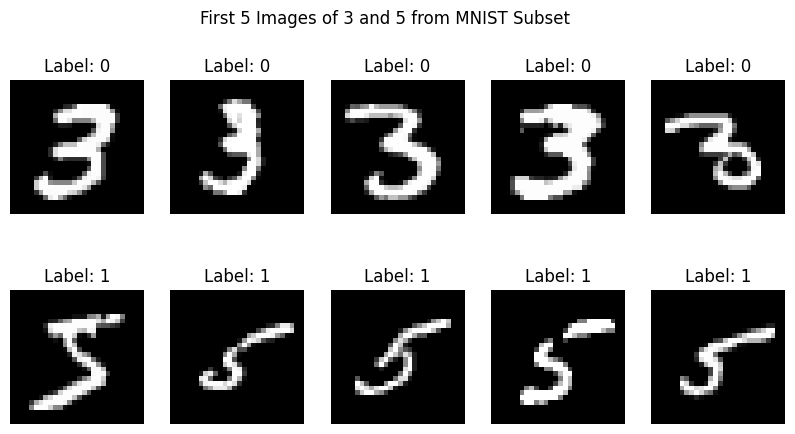

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 3]  # Get all images with label 0
images_1 = X[y == 5]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Question - 3: What does the weights array represent in this context?
Ans : In this context, the weights array represents the number of votes each pixel gets to cast .

Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?
Ans :  We are initializing the weights to zero for given reasons:


1.   Simplicity
2.   Symmetry Breaking

This could have effects on training process, some of them are:


1.   Dead Neurons
2.  Slower Convergence






## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all


## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    for epoch in range(epochs):
        for i in range(len(X)):
            # Calculate the prediction
            prediction = np.dot(X[i], weights) + bias

            # Activation function (step function)
            y_pred = 1 if prediction >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y[i]:
                weights = weights + learning_rate * (y[i] - y_pred) * X[i]
                bias = bias + learning_rate * (y[i] - y_pred)

    # Calculate accuracy after training
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    accuracy = np.mean(y_pred_all == y)
    return weights, bias, accuracy


Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?
Ans :  It calculates the weighted sum of the inputs for a given data point and adds the bias to produce a raw output.

Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?
Ans : When the prediction is wrong Weights and bias are adjusted to improve future predictions.
They are adjusted proportionally to the error (bias) and input features (weights) or just for the bias.

Why is the final accuracy important, and what do you expect it to be?
Ans : The final accuracy shows the pverall performance of the model learned to classsification of data and the result of unseen data.
For simple binary classification tasks like MNIST 0 vs. 1, the Perceptron can achieve very high accuracy, often close to 100%.

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Question - 8:What does misclassified idx store, and how is it used in this code?
Ans : Misclassified idx stores the indices of incorrectly classified images.
It is used in the code to select and display the images caused by the models error.

. Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?
Ans : "All images were correctly classified!", means that he trained perceptron model achieved 100% accuracy on the given dataset

Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_3_5 = pd.read_csv("/content/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels
y = df_3_5["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


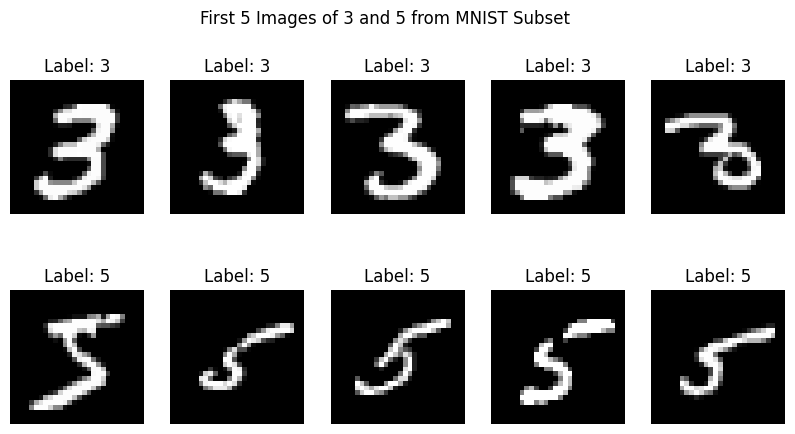

In [69]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [70]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [71]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Output is still 0 or 1
    return y_pred_all

In [72]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Modify labels to 0 and 1 for the Perceptron
    y_modified = np.where(y == 3, 0, 1)  # 3 becomes 0, 5 becomes 1

    for epoch in range(epochs):
        for i in range(len(X)):
            # Calculate the prediction
            prediction = np.dot(X[i], weights) + bias

            # Activation function (step function)
            y_pred = 1 if prediction >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y_modified[i]:
                weights = weights + learning_rate * (y_modified[i] - y_pred) * X[i]
                bias = bias + learning_rate * (y_modified[i] - y_pred)

    # Calculate accuracy after training
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    accuracy = np.mean(y_pred_all == y_modified)
    return weights, bias, accuracy

In [73]:
# Train the Perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  0.986866107260124


Final Accuracy (with original labels): 0.9869


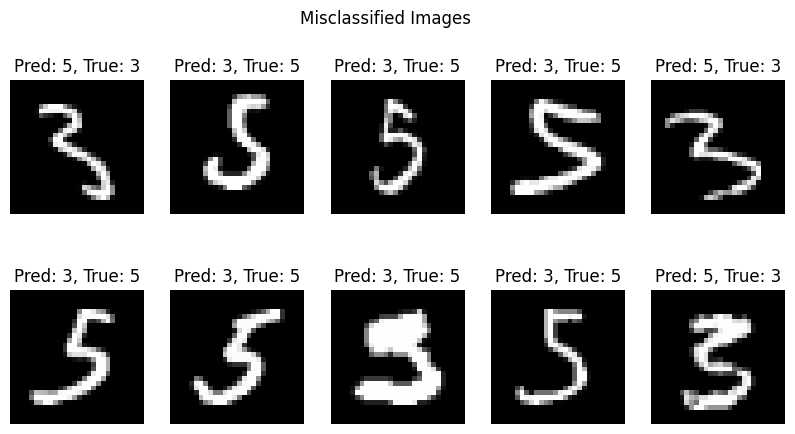

In [74]:

# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)  # Predictions are 0 or 1

# Convert predictions back to original labels (3 and 5)
y_pred_original = np.where(y_pred == 0, 3, 5)

# Calculate final accuracy (using original labels)
final_accuracy = np.mean(y_pred_original == y)
print(f"Final Accuracy (with original labels): {final_accuracy:.4f}")

# Visualize Misclassified Images
misclassified_idx = np.where(y_pred_original != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred_original[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")